In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import tensorflow as tf
import tensorflow_probability as tfp

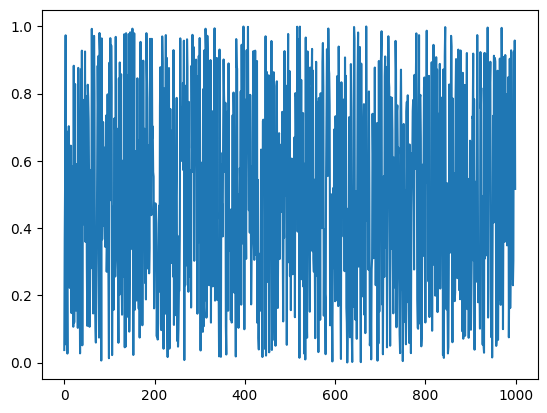

In [5]:
n = 20
p = 50
s = np.random.default_rng().uniform(0,1, n*p)
X = np.reshape(s,(-1, p))
X.shape
df = pd.DataFrame(X)
#  we let r=25
r= 5
y = np.zeros(n) #initialising y array
for i in range(n):
    yTemp = df.iloc[i,0:r].sum() + np.random.normal(0, 1) #generating y values from a simple linear model with gaussian noise
    y[i] = yTemp

plt.plot(s)

sigma1 = 1
sigma2 = 0.1
sigmay = 1
niter = 100
gamma = 0.1
rho = 1

In [6]:
p = len(X[1])
n = len(X)
b = p + n
theta = np.array([np.zeros(p)]).T                                   #initialising theta as zero vectors
Atz, z = np.array([np.empty((p,1))]*b), np.empty([0,0])             #initialising numpy array to store A^t * z and z
for i in range(b):                                                  #generating A and A^t * A and storing them into numpy array
    if i <= p-1:
        e = np.array([np.zeros(p)])
        e[0][i] = 1
        A = e * 1/sigma2
        if i == 0:
            Alist = A
            AtA = np.array([np.matmul(A.T, A)])
        else:
            Alist = np.vstack((Alist, A))
            AtA = np.vstack((AtA, np.array([np.matmul(A.T, A)])))
    else:
        X_t = X[i-p].reshape(1, p)
        A = X_t / sigmay
        Alist = np.vstack((Alist, A))
        AtA = np.vstack((AtA, np.array([np.matmul(A.T, A)])))

for t in range(niter):                                              #Beginning of Split Gibbs Sampling
    # print("Start of %sth iteration" % str(t))
    for i in range(b):
        if i <= p-1:
            sigsig = sigma2 / sigma1
            w1 = gamma * sigsig / ((gamma * sigsig) + ((1-gamma) * np.exp(-(1-sigsig**2) * (np.linalg.norm(np.matmul(Alist[i], theta)))**2/2)))
            w2 = 1 - w1
            # print(w1)
            mu = (1 - sigsig**2) * np.matmul(Alist[i], theta)
            sigmaz = 1 - sigsig**2
            pi_z = w1 * 0 + w2 * np.random.normal(mu, sigmaz)
            U = np.random.uniform()
            if U > w1:

                z = np.append(z, np.random.normal(mu, sigmaz))
            else:
                z = np.append(z, 0)
            Atz[i] = np.reshape(Alist[i] * z[i],(-1,1))
        else:
            z = np.append(z, y[i-p] / sigmay)
            Atz[i] = np.reshape(Alist[i] * z[i],(-1,1))
        # pi_z = 
    # print(sum(AtA))
    print("End of sampling z values")
    sumAAtinv = np.linalg.inv(sum(AtA))
    mu_theta = np.matmul(sumAAtinv, sum(Atz))
    print(mu_theta.shape)
    sigma_theta = np.linalg.inv(sum(AtA)) * rho**2
    L = np.linalg.cholesky(sigma_theta)
    print("Start of sampling theta")
    theta_new = mu_theta + np.matmul(L, np.reshape(np.random.multivariate_normal(np.zeros(p), np.identity(p)), (-1, 1)))
    theta = theta_new
    # print(theta.shape)
    Atz, z = np.array([np.empty((p,1))]*b), np.empty([0,0])
    print("-------------------------------------------------------")

0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.010989010989010992
0.01098901098